<a href="https://colab.research.google.com/github/YDHui/Tensorflow_Study/blob/master/LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd
import os
from sklearn.utils import check_random_state

In [0]:
n = 100
XX = np.arange(n)
rs = check_random_state(0)
YY = rs.randint(-10, 10, size=(n,)) + 2.0 * XX
data = np.stack([XX,YY], axis=1)

In [0]:
num_epochs = 100
W = tf.Variable(0.0, name="weights")
b = tf.Variable(0.0, name="bias")
def inputs():
    """
    Defining the place_holders.
    :return:
            Returning the data and label place holders.
    """
    X = tf.placeholder(tf.float32, name="X")
    Y = tf.placeholder(tf.float32, name="Y")
    return X,Y

# Create the prediction.
def inference(X):
    """
    Forward passing the X.
    :param X: Input.
    :return: X*W + b.
    """
    return X * W + b

def loss(X, Y):
    '''
    compute the loss by comparing the predicted value to the actual label.
    :param X: The input.
    :param Y: The label.
    :return: The loss over the samples.
    '''

    # Making the prediction.
    Y_predicted = inference(X)
    return tf.reduce_sum(tf.squared_difference(Y, Y_predicted))/(2*data.shape[0])


# The training function.
def train(loss):
    learning_rate = 0.0001
    return tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [18]:
with tf.Session() as sess:

    # Initialize the variables[w and b].
    sess.run(tf.global_variables_initializer())

    # Get the input tensors
    X, Y = inputs()

    # Return the train loss and create the train_op.
    train_loss = loss(X, Y)
    train_op = train(train_loss)

    # Step 8: train the model
    for epoch_num in range(num_epochs):
        loss_value, _ = sess.run([train_loss,train_op],
                                 feed_dict={X: data[:,0], Y: data[:,1]})

        # Displaying the loss per epoch.
        print('epoch %d, loss=%f' %(epoch_num+1, loss_value))

        # save the values of weight and bias
        wcoeff, bias = sess.run([W, b])

epoch 1, loss=6440.419922
epoch 2, loss=2914.888916
epoch 3, loss=1324.827271
epoch 4, loss=607.687805
epoch 5, loss=284.248230
epoch 6, loss=138.372574
epoch 7, loss=72.580688
epoch 8, loss=42.907661
epoch 9, loss=29.524731
epoch 10, loss=23.488831
epoch 11, loss=20.766571
epoch 12, loss=19.538784
epoch 13, loss=18.985041
epoch 14, loss=18.735300
epoch 15, loss=18.622658
epoch 16, loss=18.571852
epoch 17, loss=18.548943
epoch 18, loss=18.538612
epoch 19, loss=18.533949
epoch 20, loss=18.531845
epoch 21, loss=18.530897
epoch 22, loss=18.530466
epoch 23, loss=18.530277
epoch 24, loss=18.530193
epoch 25, loss=18.530149
epoch 26, loss=18.530132
epoch 27, loss=18.530125
epoch 28, loss=18.530121
epoch 29, loss=18.530119
epoch 30, loss=18.530119
epoch 31, loss=18.530115
epoch 32, loss=18.530115
epoch 33, loss=18.530119
epoch 34, loss=18.530115
epoch 35, loss=18.530117
epoch 36, loss=18.530117
epoch 37, loss=18.530117
epoch 38, loss=18.530119
epoch 39, loss=18.530119
epoch 40, loss=18.530115


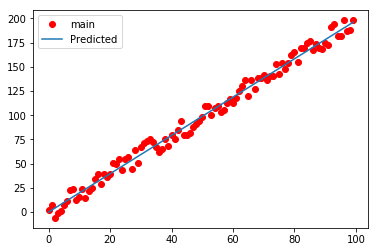

In [19]:
Input_values = data[:,0]
Labels = data[:,1]
Prediction_values = data[:,0] * wcoeff + bias

# uncomment if plotting is desired!
plt.plot(Input_values, Labels, 'ro', label='main')
plt.plot(Input_values, Prediction_values, label='Predicted')

# Saving the result.
plt.legend()
plt.show()
plt.close()